# Tables!

Parsing and manipulating tabular data in Python

## Parsing Tables from the Internet

The overall goal: **avoid manually transcribing tables**

Tables that you find on "the internet" are typically represented in HTML -- specifically as `<table>` elements. You can read more about HTML tables [here](https://en.wikipedia.org/wiki/HTML_element#Tables).

For these first examples, we will be using a very simple table from our very own DSS: the [Receiver Summary](https://dss.gb.nrao.edu/receivers/summary)

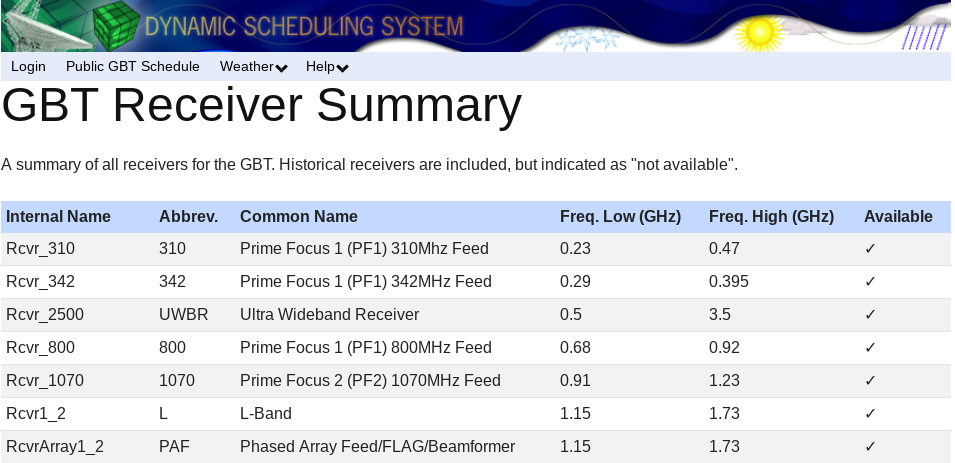

The specific parsing method depends on what you want to do with it. Let's go through a few different use cases

### Including in a Jupyter Notebook (Convert to Markdown)

This is of unique relevance, given that this presentation is in a Jupyter Notebook. The goal here is essentially to convert an HTML table to Markdown

Our goal:

| Internal Name | Abbrev. | Common Name | Freq. Low (GHz) | Freq. High (GHz) | Available |
| --- | --- | --- | --- | --- | --- |
| Rcvr_342 | 342 | Prime Focus 1 (PF1) 342MHz Feed | 0.29 | 0.395 | ✓ |
| Rcvr_2500 | UWBR | Ultra Wideband Receiver | 0.5 | 3.5 | ✓ |
| Rcvr_800 | 800 | Prime Focus 1 (PF1) 800MHz Feed | 0.68 | 0.92 | ✓ |
| Rcvr_1070 | 1070 | Prime Focus 2 (PF2) 1070MHz Feed | 0.91 | 1.23 | ✓ |
| Rcvr1_2 | L | L-Band | 1.15 | 1.73 | ✓ |

The code:

```md
| Internal Name | Abbrev. | Common Name | Freq. Low (GHz) | Freq. High (GHz) | Available |
| --- | --- | --- | --- | --- | --- |
| Rcvr_342 | 342 | Prime Focus 1 (PF1) 342MHz Feed | 0.29 | 0.395 | ✓ |
| Rcvr_2500 | UWBR | Ultra Wideband Receiver | 0.5 | 3.5 | ✓ |
| Rcvr_800 | 800 | Prime Focus 1 (PF1) 800MHz Feed | 0.68 | 0.92 | ✓ |
| Rcvr_1070 | 1070 | Prime Focus 2 (PF2) 1070MHz Feed | 0.91 | 1.23 | ✓ |
| Rcvr1_2 | L | L-Band | 1.15 | 1.73 | ✓ |
```

So, how do we get there?

#### Text Editor

The "simplest" way to do this is to simply copy and paste the table into a text editor. I'll use Sublime here, but it will work basically the same in VS Code, etc.

**LIVE DEMO**

#### Browser Extension

I use the **CopyTables** extension ([Firefox](https://addons.mozilla.org/en-US/firefox/addon/copywebtables/)) ([Chrome](https://chrome.google.com/webstore/detail/copytables/ekdpkppgmlalfkphpibadldikjimijon)), which makes it trivial to convert a table to a plain-text format (e.g. CSV or tab-delimited) prior to copying to the clipboard. You can then simply paste into your text editor and save the file.

**LIVE DEMO**

#### Pandas

[Pandas](https://pandas.pydata.org/) is a data analysis library for Python. The primary features we care about is its core data model, the DataFrame, and its ability to parse data from the web (and various other formats) _into_ DataFrames.

In [1]:
import json

import pandas as pd

df = pd.read_html("https://dss.gb.nrao.edu/receivers/summary")[0]
df.head()

,Internal Name,Abbrev.,Common Name,Freq. Low (GHz),Freq. High (GHz),Available
0,Rcvr_310,310,Prime Focus 1 (PF1) 310Mhz Feed,0.23,0.47,â
1,Rcvr_342,342,Prime Focus 1 (PF1) 342MHz Feed,0.29,0.395,â
2,Rcvr_2500,UWBR,Ultra Wideband Receiver,0.5,3.5,â
3,Rcvr_800,800,Prime Focus 1 (PF1) 800MHz Feed,0.68,0.92,â
4,Rcvr_1070,1070,Prime Focus 2 (PF2) 1070MHz Feed,0.91,1.23,â


Looks good... except for the "Available" column. Whenever you see strange looking characters like that, you should immediately suspect an encoding issue.

In this case, the DSS website has a bug -- it doesn't indicate the content type! Browsers are able to figure this out, but Pandas can't. But we can tell it what to do here:

In [2]:
df = pd.read_html("https://dss.gb.nrao.edu/receivers/summary", encoding="utf-8")[0]
df.head()

,Internal Name,Abbrev.,Common Name,Freq. Low (GHz),Freq. High (GHz),Available
0,Rcvr_310,310,Prime Focus 1 (PF1) 310Mhz Feed,0.23,0.47,✓
1,Rcvr_342,342,Prime Focus 1 (PF1) 342MHz Feed,0.29,0.395,✓
2,Rcvr_2500,UWBR,Ultra Wideband Receiver,0.5,3.5,✓
3,Rcvr_800,800,Prime Focus 1 (PF1) 800MHz Feed,0.68,0.92,✓
4,Rcvr_1070,1070,Prime Focus 2 (PF2) 1070MHz Feed,0.91,1.23,✓


In [3]:
# Requires `tabulate` package
print(df.head().to_markdown())

|    | Internal Name   | Abbrev.   | Common Name                      |   Freq. Low (GHz) |   Freq. High (GHz) | Available   |
|---:|:----------------|:----------|:---------------------------------|------------------:|-------------------:|:------------|
|  0 | Rcvr_310        | 310       | Prime Focus 1 (PF1) 310Mhz Feed  |              0.23 |              0.47  | ✓           |
|  1 | Rcvr_342        | 342       | Prime Focus 1 (PF1) 342MHz Feed  |              0.29 |              0.395 | ✓           |
|  2 | Rcvr_2500       | UWBR      | Ultra Wideband Receiver          |              0.5  |              3.5   | ✓           |
|  3 | Rcvr_800        | 800       | Prime Focus 1 (PF1) 800MHz Feed  |              0.68 |              0.92  | ✓           |
|  4 | Rcvr_1070       | 1070      | Prime Focus 2 (PF2) 1070MHz Feed |              0.91 |              1.23  | ✓           |


#### Table Converter (Website)

https://tableconvert.com/csv-to-markdown

#### Table Converter (Website)

Copy and paste the table data from your browser into the CSV converter page:

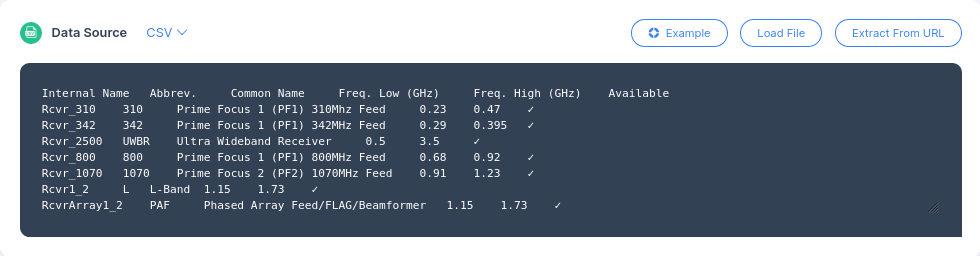

#### Table Converter (Website)

The parsed table will appear below. Inspect this to make sure it worked correctly

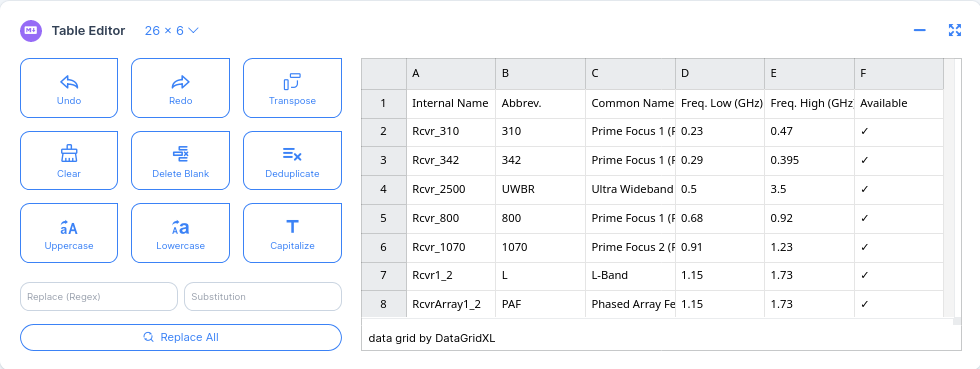

#### Table Converter (Website)

The output will be below that. You can convert to a variety of formats; we just care about Markdown:

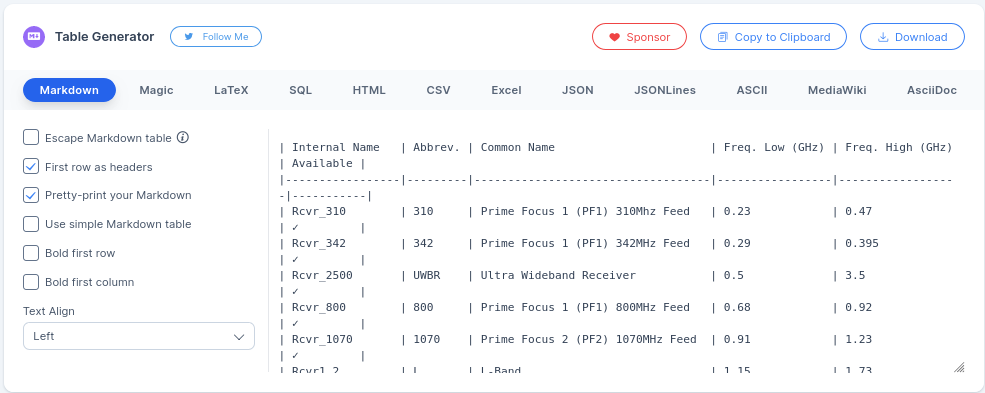

#### Spreadsheet

All of you have used a spreadsheet before. But you might not know that you can directly open many web pages in LibreCalc, Excel, etc.

We can't actually export Markdown from a spreadsheet, but it's still useful for other cases. Here's what table parsing looks like in Libre Calc:

`File > Open`, then paste the URL and open it. At this point you can select the table, then export it as CSV/etc. It should look something like:

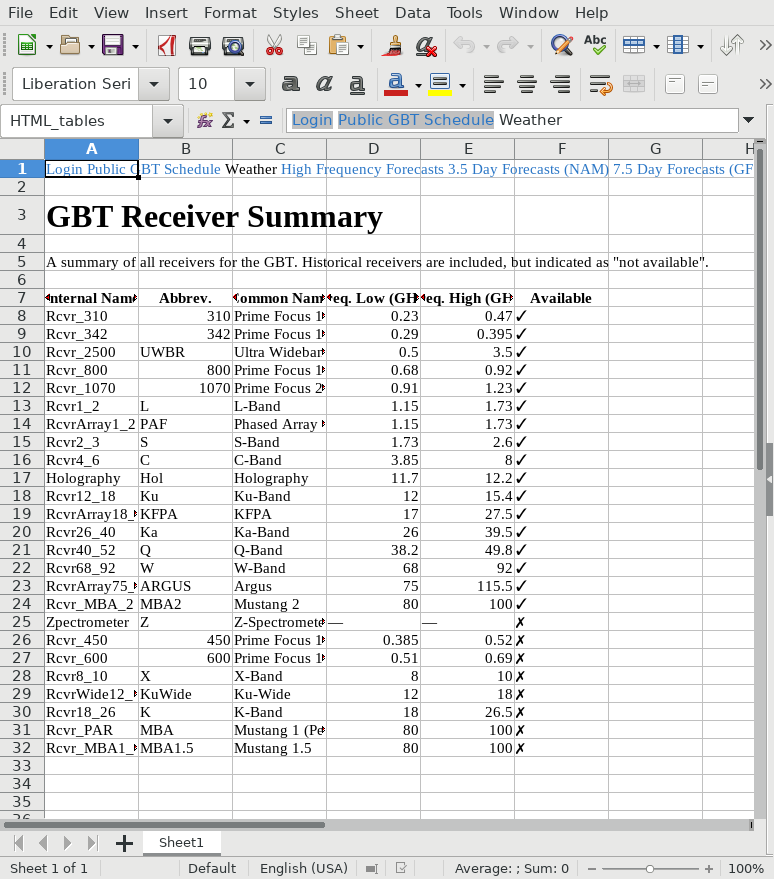

---

### NRAO AAT

Moving on to something a bit more complicated...

Here's another example, from NRAO's Archive Access Tool:

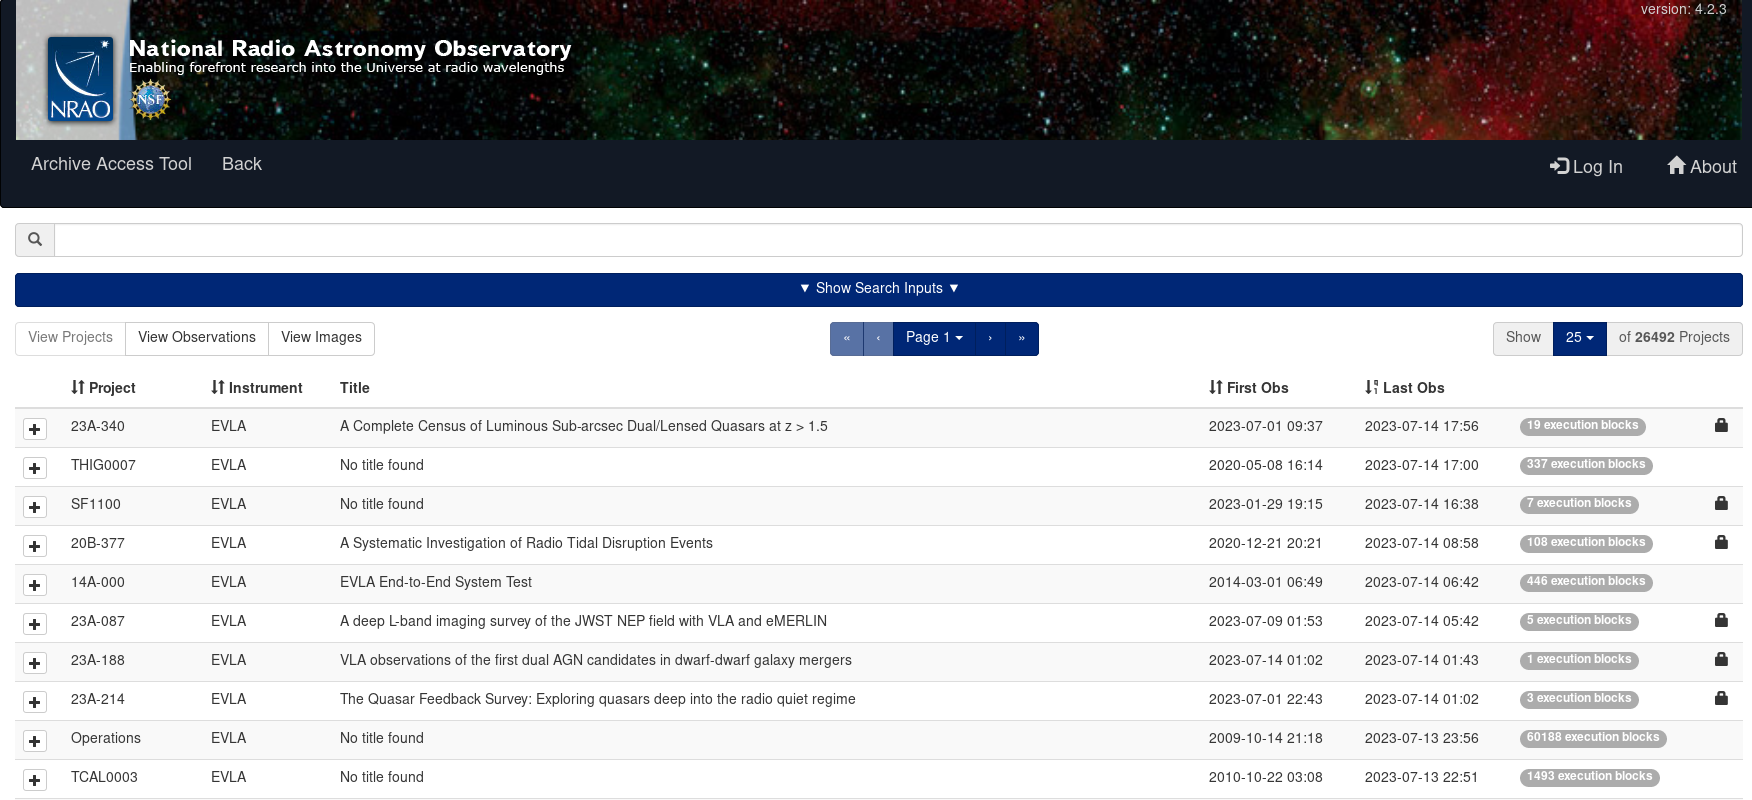

Let's try `pd.read_html` again

In [4]:
import json

import pandas as pd

aat_table = pd.read_html("https://data.nrao.edu/portal/")

ValueError: No tables found

Uh oh! No tables found. Why might that be? Let's fetch the page ourselves -- maybe we can do a better job parsing the data manually

In [5]:
import requests

# Request the page...
aat_response = requests.get("https://data.nrao.edu/portal/")
print(f"Response: {aat_response.status_code}")

# ...print the response as text
print(aat_response.text)

Response: 200
<!DOCTYPE html>
<html class="no-js"
      lang="en">
<head>
    <base href="/">
    <title>NRAO Archive Interface</title>
    <meta name="description" content="NRAO Archive Interface">
    <meta name="author" content="Richard Falardeau">
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="shortcut icon" href="portal/media/favicon.ico">
</head>
<div id="spinner" style="display:none"></div>
<body ng-app="app" class="container-fluid body-padding">

<app-component></app-component>

<script src="portal/js/env.js"></script>
<script src="portal/js/MotD.js"></script>
<script src="portal/js/publicThumbProjects.js"></script>
<script type="text/javascript" src="portal/js/vendors~app-bundle.js"></script><script type="text/javascript" src="portal/js/app-bundle.js"></script></body>
</html>



So, this is in fact HTML... but where's the table?

Well, through the magic of Javascript, the table that we see on the web page is actually being rendered *in our browser* via Javascript

If this is a one-off table import, then we might be able to get away with a "manual" approach. For example, we can copy/paste the table data into a string (either manually, by selecting the whole table, or via an extension like CopyTable), then parse it into a table:

In [6]:
raw_aat_table_text = """
Project 	Instrument 	Title 	First Obs 	Last Obs 		
23A-340 	EVLA 	A Complete Census of Luminous Sub-arcsec Dual/Lensed Quasars at z > 1.5 	2023-07-01 09:37 	2023-07-14 17:56 	19 execution blocks 	
THIG0007 	EVLA 	No title found 	2020-05-08 16:14 	2023-07-14 17:00 	337 execution blocks 	
SF1100 	EVLA 	No title found 	2023-01-29 19:15 	2023-07-14 16:38 	7 execution blocks 	
20B-377 	EVLA 	A Systematic Investigation of Radio Tidal Disruption Events 	2020-12-21 20:21 	2023-07-14 08:58 	108 execution blocks 	
14A-000 	EVLA 	EVLA End-to-End System Test 	2014-03-01 06:49 	2023-07-14 06:42 	446 execution blocks 	
23A-087 	EVLA 	A deep L-band imaging survey of the JWST NEP field with VLA and eMERLIN 	2023-07-09 01:53 	2023-07-14 05:42 	5 execution blocks 	
23A-188 	EVLA 	VLA observations of the first dual AGN candidates in dwarf-dwarf galaxy mergers 	2023-07-14 01:02 	2023-07-14 01:43 	1 execution blocks 	
23A-214 	EVLA 	The Quasar Feedback Survey: Exploring quasars deep into the radio quiet regime 	2023-07-01 22:43 	2023-07-14 01:02 	3 execution blocks 	
Operations 	EVLA 	No title found 	2009-10-14 21:18 	2023-07-13 23:56 	60188 execution blocks 	
TCAL0003 	EVLA 	No title found 	2010-10-22 03:08 	2023-07-13 22:51 	1493 execution blocks 	
23A-249 	EVLA 	Confirming the Discovery of 15 New Lensed Radio Sources Identified by VLASS 	2023-07-13 00:33 	2023-07-13 14:40 	2 execution blocks 	
23A-271 	EVLA 	Star Formation Heating Sources in Starburst Galaxies 	2023-06-29 23:17 	2023-07-13 14:04 	18 execution blocks 	
2022.1.01479.S 	ALMA 	CO Excitation Across the Local Galaxy Population 	2022-10-15 01:39 	2023-07-13 11:55 	67 execution blocks 	
2022.1.01515.S 	ALMA 	An unbiased census of the molecular gas content in the most massive galaxies in the nearby Universe 	2023-01-01 20:15 	2023-07-13 10:30 	59 execution blocks 	
2022.1.00064.S 	ALMA 	Feeding BEARS at Cosmic Noon 	2023-05-05 11:35 	2023-07-13 10:00 	43 execution blocks 	
TSUB0001 	EVLA 	No title found 	2011-04-30 07:38 	2023-07-13 09:44 	917 execution blocks 	
2022.1.01348.S 	ALMA 	An ALMA Study of Hidden Dual AGN in Nearby Post-Mergers 	2023-07-09 07:50 	2023-07-13 09:35 	2 execution blocks 	
2022.1.01507.S 	ALMA 	A CO emission follow-up survey of the DINGO Pilot survey: the evolution of molecular gas over the past 3 Gyrs 	2023-01-09 19:28 	2023-07-13 08:39 	30 execution blocks 	
2022.1.01473.S 	ALMA 	Identifying the dominant heating source of the interstellar medium in the central 300 pc region of a quasar at z=6 	2022-10-15 02:19 	2023-07-13 08:31 	5 execution blocks 	
2022.1.00974.S 	ALMA 	Massive Star Forming Cores with Class II Methanol Masers 	2023-01-10 03:36 	2023-07-13 07:02 	33 execution blocks 	
2022.1.00700.S 	ALMA 	The Formation of High-Mass Binaries and Their Accretion Disks 	2023-07-10 05:16 	2023-07-13 06:55 	4 execution blocks 	
2022.1.00290.S 	ALMA 	Is atomic carbon a good tracer of H2 gas?: Impacts of cosmic-ray and/or shock induced destructions of CO 	2023-01-18 13:21 	2023-07-13 04:52 	34 execution blocks 	
2022.1.00738.S 	ALMA 	Water masers and the hidden nature of Compact Obscured Nuclei 	2023-07-01 10:07 	2023-07-13 03:51 	6 execution blocks 	
23A-256 	EVLA 	Protostellar Multiplicity in Isolation: Completing the Close Companion Survey 	2023-07-04 05:57 	2023-07-12 12:46 	7 execution blocks 	
23A-012 	EVLA 	ZTF J185139.81+171430.3: A possible slowly rotating twin of AR Sco 	2023-07-12 08:04 	2023-07-12 09:04 	1 execution blocks"""

In [7]:
import io 

aat_df = pd.read_table(io.StringIO(raw_aat_table_text))
aat_df.head()

,Project,Instrument,Title,First Obs,Last Obs,Unnamed: 5,Unnamed: 6
0,23A-340,EVLA,A Complete Census of Luminous Sub-arcsec Dual/...,2023-07-01 09:37,2023-07-14 17:56,19 execution blocks,NaN
1,THIG0007,EVLA,No title found,2020-05-08 16:14,2023-07-14 17:00,337 execution blocks,NaN
2,SF1100,EVLA,No title found,2023-01-29 19:15,2023-07-14 16:38,7 execution blocks,NaN
3,20B-377,EVLA,A Systematic Investigation of Radio Tidal Disr...,2020-12-21 20:21,2023-07-14 08:58,108 execution blocks,NaN
4,14A-000,EVLA,EVLA End-to-End System Test,2014-03-01 06:49,2023-07-14 06:42,446 execution blocks,NaN


In [8]:
# Drop the last column; it is of no value
del aat_df[aat_df.columns[-1]]
# Rename the Exec. Block column
aat_df.rename(columns={"Unnamed: 5": "# EB"}).head()

,Project,Instrument,Title,First Obs,Last Obs,# EB
0,23A-340,EVLA,A Complete Census of Luminous Sub-arcsec Dual/...,2023-07-01 09:37,2023-07-14 17:56,19 execution blocks
1,THIG0007,EVLA,No title found,2020-05-08 16:14,2023-07-14 17:00,337 execution blocks
2,SF1100,EVLA,No title found,2023-01-29 19:15,2023-07-14 16:38,7 execution blocks
3,20B-377,EVLA,A Systematic Investigation of Radio Tidal Disr...,2020-12-21 20:21,2023-07-14 08:58,108 execution blocks
4,14A-000,EVLA,EVLA End-to-End System Test,2014-03-01 06:49,2023-07-14 06:42,446 execution blocks


That _does work_, but it's rather error prone, and what if we wanted multiple pages worth of data?

You might be tempted (or some guide you find online might try to tempt you) to try automating the rendering of this website via some sort of browser automation tool like Selenium. *This is generally overkill*, and not really the correct tool for the job.

The question isn't "how do I automate this manual parsing/scraping process?". It's **"where is the Javascript that's running in my browser getting its data?"**

*DEMO TIME*

1. Navigate to https://data.nrao.edu/portal/
2. Show source code
3. Show Inspect Element
4. Show Network tab
5. Reload page, and watch as requests come through
6. Show that the final request contains table data, as a JSON string

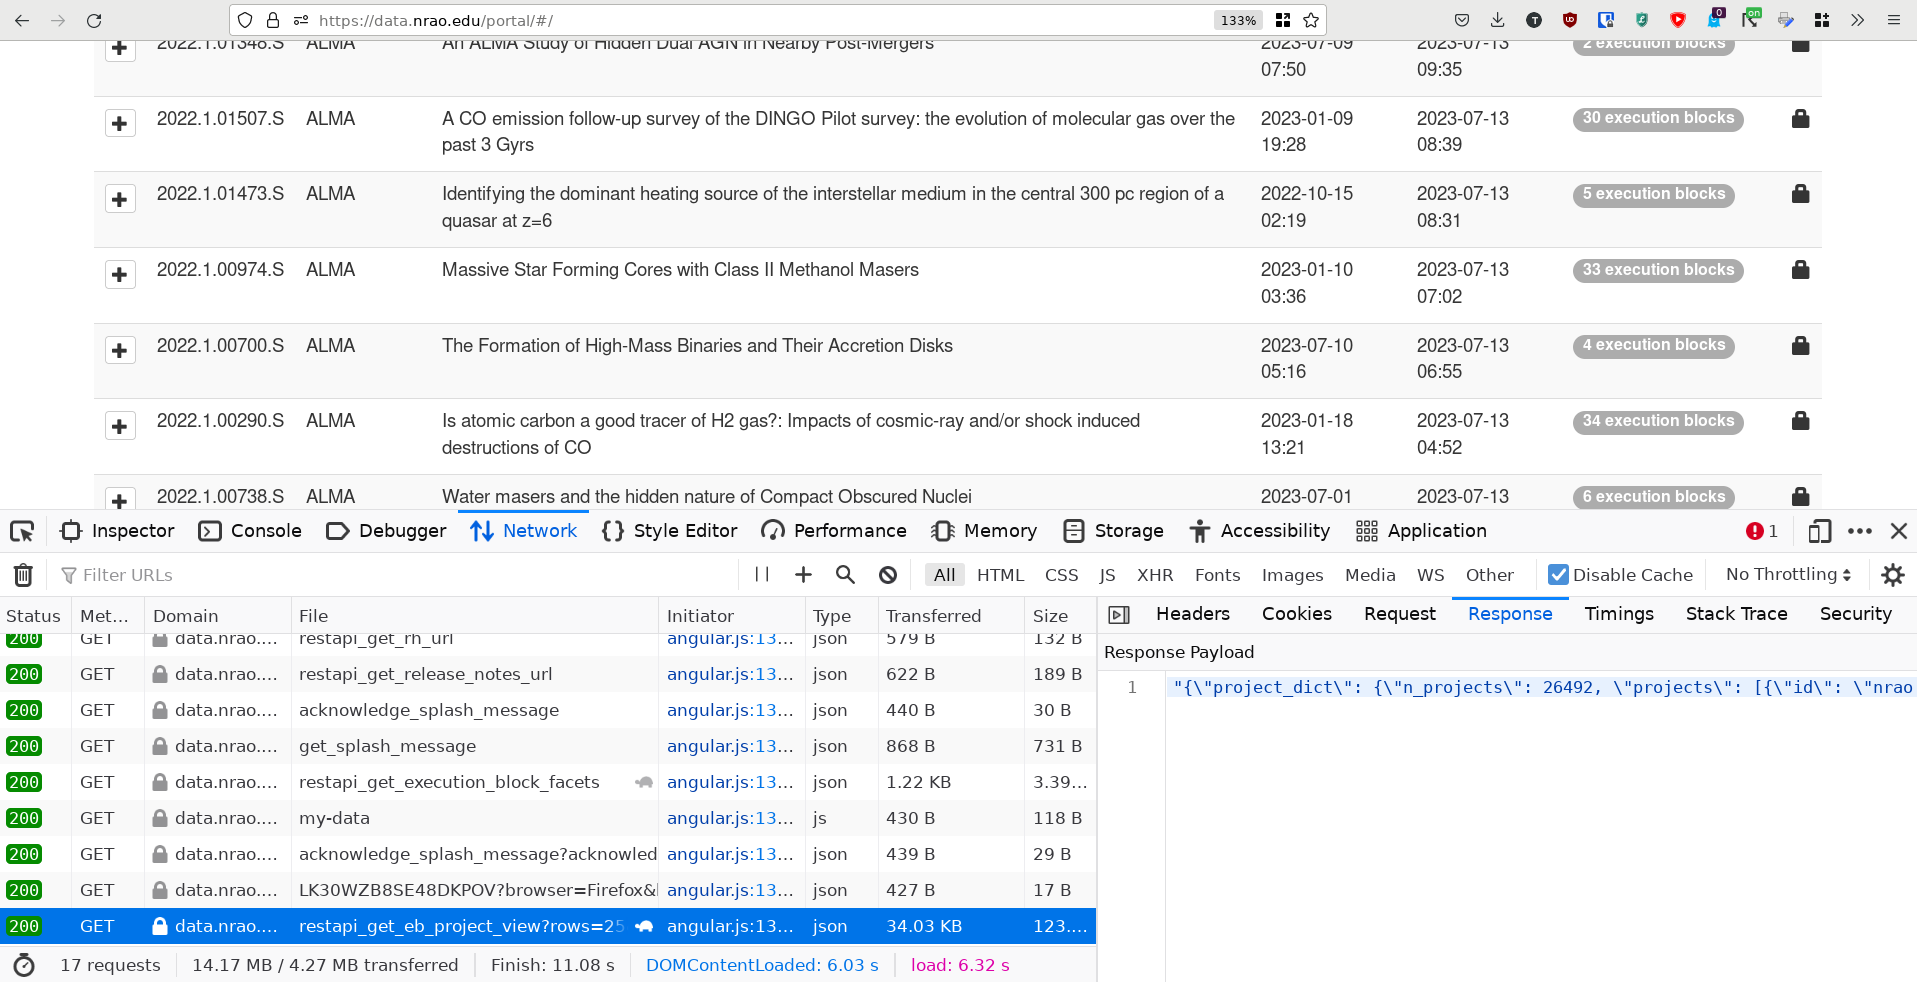

So, we can see that the final request is what contains the data that is ultimately displayed in the table. So, what if we grab that data directly?

In [9]:
# Again we use requests to get the HTML for this URL
aat_table_response = requests.get(
    "https://data.nrao.edu/archive-service/restapi_get_eb_project_view?rows=25&sort=proj_stop+desc&start=0"
)
# Here are the first 100 characters of the response
print(aat_table_response.text[:100])

"{\"project_dict\": {\"n_projects\": 26506, \"projects\": [{\"id\": \"nrao:570588\", \"eb_id\": 5705


That looks like JSON! We see a dict of dicts, and a dict of lists. So let's parse that using `requests.Response.json`:

In [10]:
aat_table_json_string = aat_table_response.json()
print(aat_table_json_string[:100])
print(f"{type(aat_table_json_string)=}")

{"project_dict": {"n_projects": 26506, "projects": [{"id": "nrao:570588", "eb_id": 570588, "sci_prod
type(aat_table_json_string)=<class 'str'>


That looks _better_... but it's still a string, and we want it to be a dictionary!

In [11]:
# AAT uses a rather strange serialization scheme, where the "real" JSON is essentially "nested" within a string
# So we have to parse it a second time, this time with the std library
aat_table_json = json.loads(aat_table_json_string)
print(type(aat_table_json))
print(aat_table_json.keys())

<class 'dict'>
dict_keys(['project_dict', 'n_results', 'data', 'response_msg'])


Above we've done some very limited introspection of the "response dictionary". But it can be difficult to know what `project_dict` is, or what `data` is, unless we look through their data. And when their data are very large, it can be difficult to look through.

But there is a useful library called [rich](https://rich.readthedocs.io/en/latest/) which makes it much easier!

In [12]:
from rich import inspect

inspect(aat_table_json)

╭─────────────────────────────────────────── <class 'dict'> ───────────────────────────────────────────╮
│ dict() -> new empty dictionary                                                                       │
│ dict(mapping) -> new dictionary initialized from a mapping object's                                  │
│     (key, value) pairs                                                                               │
│ dict(iterable) -> new dictionary initialized as if via:                                              │
│     d = {}                                                                                           │
│     for k, v in iterable:                                                                            │
│         d[k] = v                                                                                     │
│ dict(**kwargs) -> new dictionary initialized with the name=value pairs                               │
│     in the keyword argument list.  For example:  dict(one=1, two=2)                                  │
│                                                                                                      │
│ ╭──────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ {                                                                                                │ │
│ │ │   'project_dict': {                                                                            │ │
│ │ │   │   'n_projects': 26506,                                                                     │ │
│ │ │   │   'projects': [                                                                            │ │
│ │ │   │   │   {                                                                                    │ │
│ │ │   │   │   │   'id': 'nrao:570588',                                                             │ │
│ │ │   │   │   │   'eb_id': 570588,                                                                 │ │
│ │ │   │   │   │   'sci_prod_locator': 'uid://evla/execblock/019f1285-a6f9-4d4d-835b-4aec411a5638', │ │
│ │ │   │   │   │   'obs_id': '23A-324.sb44318273.eb44341564.60143.73620483796',                     │ │
│ │ │   │   │   │   'schedBlockName': None,                                                          │ │
│ │ │   │   │   │   'filegroup_id': None,                                                            │ │
│ │ │   │   │   │   'legacy_id': 'AL1270',                                                           │ │
│ │ │   │   │   │   'project_code': '23A-324',                                                       │ │
│ │ │   │   │   │   'title': 'The link between the multi-scale structure and star formatio'+18,      │ │
│ │ │   │   │   │   'abstract': 'This proposal will conduct a multi-resolution and multi-freq'+1217, │ │
│ │ │   │   │   │   ... +31                                                                          │ │
│ │ │   │   │   },                                                                                   │ │
│ │ │   │   │   {                                                                                    │ │
│ │ │   │   │   │   'id': 'nrao:569695',                                                             │ │
│ │ │   │   │   │   'eb_id': 569695,                                                                 │ │
│ │ │   │   │   │   'sci_prod_locator': 'uid://evla/execblock/4ee05382-e071-430c-8d95-36e203f0556e', │ │
│ │ │   │   │   │   'obs_id': '23A-212.sb43987278.eb44295937.60129.701549108795',                    │ │
│ │ │   │   │   │   'schedBlockName': None,                                                          │ │
│ │ │   │   │   │   'filegroup_id': None,                                                            │ │
│ │ │   │   │   │   'legacy_id': 'AM1740',                                                           │ │
│ │ │   │   │   │   'project_code': '23A-212',                                                       │ │
│ │ │   │ 

It seems that both `project_dict` and `data` have useful information! Let's just choose `data` for now. This means that `aat_table_json["data"]` will contain "the data" that we want to convert into a DataFrame.

In [13]:
# Now we can convert the table data to a DataFrame
# Pandas natively understands "list of dicts", so this is quite simple
aat_table_data = pd.DataFrame(aat_table_json["data"])
aat_table_data.head()

,id,eb_id,sci_prod_locator,obs_id,schedBlockName,filegroup_id,legacy_id,project_code,title,abstract,...,problem_link,mousId,gousId,sousId,vlba_segment,segment_start,segment_stop,segment_bands,segment_size,n_execution_blocks
0,nrao:570588,570588,uid://evla/execblock/019f1285-a6f9-4d4d-835b-4...,23A-324.sb44318273.eb44341564.60143.73620483796,None,None,AL1270,23A-324,The link between the multi-scale structure and...,This proposal will conduct a multi-resolution ...,...,None,None,None,None,None,None,None,[],None,1
1,nrao:569695,569695,uid://evla/execblock/4ee05382-e071-430c-8d95-3...,23A-212.sb43987278.eb44295937.60129.701549108795,None,None,AM1740,23A-212,Testing the origin of jets from super-Eddingto...,One of the outstanding mysteries in modern ast...,...,None,None,None,None,None,None,None,[],None,3
2,nrao:564001,564001,uid://evla/execblock/a0099462-658f-4fd9-b60f-f...,23A-060.sb43772768.eb43775601.60039.41875373843,None,None,AV482,23A-060,Unravelling the radio emission of a transient ...,"In roughly half of all X-ray binaries, mass is...",...,None,None,None,None,None,None,None,[],None,8
3,nrao:569947,569947,uid://evla/execblock/f56440d1-0d8d-41fe-a18f-5...,23A-340.sb44261182.eb44314441.60133.046097858794,None,None,AL1271,23A-340,A Complete Census of Luminous Sub-arcsec Dual/...,The galactic-scale (<~30 kpc) environment of q...,...,None,None,None,None,None,None,None,[],None,21
4,nrao:570094,570094,uid://evla/execblock/3b949600-4f7c-4680-8853-5...,23A-271.sb44006228.eb44318546.60136.62044920139,None,None,AB1895,23A-271,Star Formation Heating Sources in Starburst Ga...,Star formation processes play a key role in th...,...,None,None,None,None,None,None,None,[],None,24


Now we have our data, plus a lot more than we had before! This is because we are using the **API**, rather than scraping. AAT doesn't provide a public API, but often you can still figure out what the private API is, and query it directly.

As I touched on earlier, there are two other major benefits:

- You can control the page size
- You can request an arbitrary page

Combined, these two things allow you to easily walk through several pages, pull the response, and concatentate the results

Recall that our URL looked something like this:
https://data.nrao.edu/archive-service/restapi_get_eb_project_view?rows=25&sort=proj_stop+desc&start=0
It's a good bit cleaner to parse this into a parameter dict for easier manipulation. It's better still to create some functions!

In [14]:
import time


def aat_project_list_page_to_df(
    url="https://data.nrao.edu/archive-service/restapi_get_eb_project_view",
    page_size=25,
    start=0
) -> pd.DataFrame:
    """Request a single page of AAT results; return as a DataFrame"""

    params = {"rows": page_size, "start": start, "sort": "proj_stop desc"}
    response = requests.get(url, params=params)
    # Raise error if we get an HTTP error status code
    response.raise_for_status()

    # Pause between requests to avoid spamming the server too hard
    time.sleep(0.1)
    
    aat_table_json_string = response.json()
    # AAT uses a rather strange serialization scheme, where the "real" JSON is essentially "nested" within a string
    # So we have to parse it a second time, this time with the std library
    aat_table_json = json.loads(aat_table_json_string)
    
    return pd.DataFrame(aat_table_json["data"])

def aat_project_list_to_df(pages=4, page_size=25):
    """Request given number of Project List pages from AAT; return as DF"""
    
    pages = [aat_project_list_page_to_df(start=page*page_size, page_size=page_size) for page in range(pages)]
    return pd.concat(pages, ignore_index=True)

In [15]:
df = aat_project_list_to_df(pages=2)

df

,id,eb_id,sci_prod_locator,obs_id,schedBlockName,filegroup_id,legacy_id,project_code,title,abstract,...,problem_link,mousId,gousId,sousId,vlba_segment,segment_start,segment_stop,segment_bands,segment_size,n_execution_blocks
0,nrao:570588,570588,uid://evla/execblock/019f1285-a6f9-4d4d-835b-4...,23A-324.sb44318273.eb44341564.60143.73620483796,None,None,AL1270,23A-324,The link between the multi-scale structure and...,This proposal will conduct a multi-resolution ...,...,None,None,None,None,None,None,None,[],None,1
1,nrao:569695,569695,uid://evla/execblock/4ee05382-e071-430c-8d95-3...,23A-212.sb43987278.eb44295937.60129.701549108795,None,None,AM1740,23A-212,Testing the origin of jets from super-Eddingto...,One of the outstanding mysteries in modern ast...,...,None,None,None,None,None,None,None,[],None,3
2,nrao:564001,564001,uid://evla/execblock/a0099462-658f-4fd9-b60f-f...,23A-060.sb43772768.eb43775601.60039.41875373843,None,None,AV482,23A-060,Unravelling the radio emission of a transient ...,"In roughly half of all X-ray binaries, mass is...",...,None,None,None,None,None,None,None,[],None,8
3,nrao:569947,569947,uid://evla/execblock/f56440d1-0d8d-41fe-a18f-5...,23A-340.sb44261182.eb44314441.60133.046097858794,None,None,AL1271,23A-340,A Complete Census of Luminous Sub-arcsec Dual/...,The galactic-scale (<~30 kpc) environment of q...,...,None,None,None,None,None,None,None,[],None,21
4,nrao:570094,570094,uid://evla/execblock/3b949600-4f7c-4680-8853-5...,23A-271.sb44006228.eb44318546.60136.62044920139,None,None,AB1895,23A-271,Star Formation Heating Sources in Starburst Ga...,Star formation processes play a key role in th...,...,None,None,None,None,None,None,None,[],None,24
5,nrao:148974,148974,uid://evla/execblock/37cb44a9-393e-4ce1-bb19-8...,20A-346.sb38096442.eb38216745.58992.52579186343,None,None,AL1139,20A-346,A VLA Local Group Legacy Survey - X-Proposal,"We propose the deepest, highest spatial and ve...",...,None,None,None,None,None,None,None,[],None,337
6,nrao:570540,570540,uid://evla/execblock/e6945379-c17d-461b-91b5-d...,23A-064.sb44024998.eb44337932.60143.2822545949,None,None,AC1591,23A-064,Multi-frequency VLA observation of two radio q...,"Recently, two high-z radio quasars (J1420+1205...",...,None,None,None,None,None,None,None,[],None,1
7,nrao:570539,570539,uid://evla/execblock/c802261a-522b-403c-a9ec-c...,21B-286.sb42809552.eb44337930.60143.224034976854,None,None,AD861,21B-286,The North American Nanohertz Observatory for G...,The era of gravitational wave (GW) astronomy i...,...,None,None,None,None,None,None,None,[],None,144
8,nrao:570538,570538,uid://evla/execblock/d7daa8ed-c839-45c2-928a-6...,23A-128.sb44323197.eb44337928.60143.15134630787,None,None,AB1886,23A-128,M2O: Catching accretion bursts (2023),The Maser Monitoring Organisation (M2O) is a g...,...,None,None,None,None,None,None,None,[],None,3
9,nrao:570389,570389,uid://evla/execblock/55513175-da90-455d-a584-b...,23A-214.sb44078480.eb44331544.60139.94819614584,None,None,AN231,23A-214,The Quasar Feedback Survey: Exploring quasars ...,Galaxy-formation models require energy injecti...,...,None,None,None,None,None,None,None,[],None,7


---

### Is this a table?

This is a grid I found on "the internet": https://www.w3schools.com/css/css_grid.asp

It _looks_ like a table... but is it?

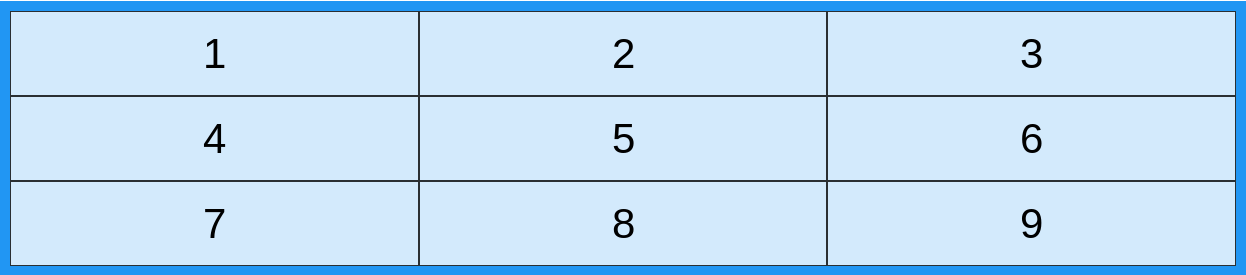

### Is this a table?

Here's some additional context -- does that change your answer? We can now see that it is a `div` of `div`s

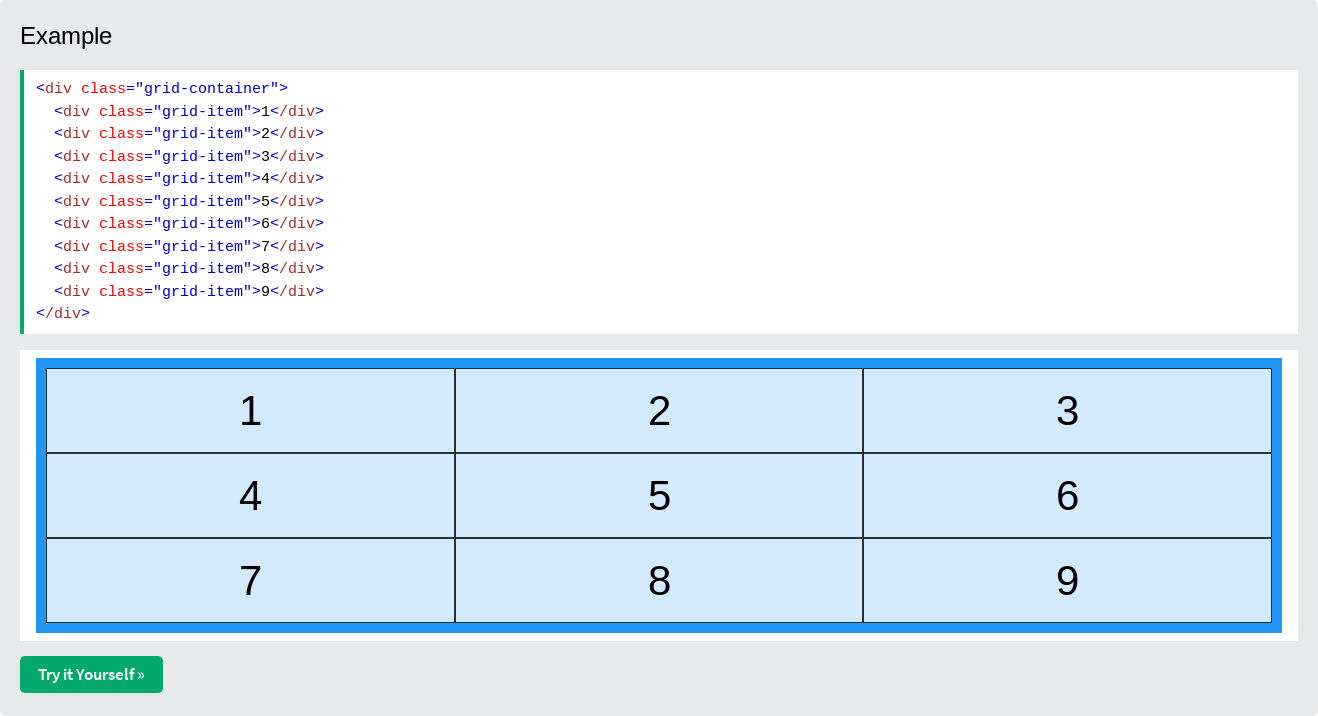

LIVE DEMO

- Navigate to https://www.w3schools.com/css/tryit.asp?filename=trycss_grid
- Open dev tools, then Inspect the outer div of the grid
- or just edit on the left pane
- Turn off the `display` style for `.grid-container2`
- Observe that the display switches to a list
- Explain that the only reason this set of `div` elements displayed as a grid was because of CSS -- it's really just a sequence of `div` elements, not a `table`
- So, _no_ it's not a table. Or perhaps it's a table with only a single column

**Not all "tables" are actually tables!**

## Table Operations

Let's transition from the "parsing" side to the "slicing" side. This is a _brief_ intro to filtering/slicing/selecting a subset of data from a given DataFrame.

i.e.: once you have a table... now what? Let's had back to our receiver table, to keep things simple.

In [16]:
df = pd.read_html("https://dss.gb.nrao.edu/receivers/summary", encoding="utf-8")[0]
df.head()

,Internal Name,Abbrev.,Common Name,Freq. Low (GHz),Freq. High (GHz),Available
0,Rcvr_310,310,Prime Focus 1 (PF1) 310Mhz Feed,0.23,0.47,✓
1,Rcvr_342,342,Prime Focus 1 (PF1) 342MHz Feed,0.29,0.395,✓
2,Rcvr_2500,UWBR,Ultra Wideband Receiver,0.5,3.5,✓
3,Rcvr_800,800,Prime Focus 1 (PF1) 800MHz Feed,0.68,0.92,✓
4,Rcvr_1070,1070,Prime Focus 2 (PF2) 1070MHz Feed,0.91,1.23,✓


It _looks_ about right...

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Internal Name     25 non-null     object
 1   Abbrev.           25 non-null     object
 2   Common Name       25 non-null     object
 3   Freq. Low (GHz)   25 non-null     object
 4   Freq. High (GHz)  25 non-null     object
 5   Available         25 non-null     object
dtypes: object(6)
memory usage: 1.3+ KB


But, `Dtype` is `object` for all columns! This is fine for converting to Markdown (that's all strings anyway), but where are the _numbers_?

(More on `object` and string data types generally is here: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-types)

The issue is basically that Pandas doesn't know that `—` (Em Dash) means `None` in our table.

In [18]:
df = pd.read_html("https://dss.gb.nrao.edu/receivers/summary", encoding="utf-8", na_values="—")[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Internal Name     25 non-null     object 
 1   Abbrev.           25 non-null     object 
 2   Common Name       25 non-null     object 
 3   Freq. Low (GHz)   24 non-null     float64
 4   Freq. High (GHz)  24 non-null     float64
 5   Available         25 non-null     object 
dtypes: float64(2), object(4)
memory usage: 1.3+ KB


Now, our two numeric columns are correctly parsed as `float64` dtype

The next issue is that `Available` really shouldn't be a string (`object`) -- it needs to be boolean (True/False)!

We can do this by replacing each `✓` with `True` and `✗` with `False`. Numpy provides [`DataFrame.replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) for this

In [19]:
df["Available"] = df["Available"].replace({"✓": True, "✗": False})
df.head()

,Internal Name,Abbrev.,Common Name,Freq. Low (GHz),Freq. High (GHz),Available
0,Rcvr_310,310,Prime Focus 1 (PF1) 310Mhz Feed,0.23,0.470,True
1,Rcvr_342,342,Prime Focus 1 (PF1) 342MHz Feed,0.29,0.395,True
2,Rcvr_2500,UWBR,Ultra Wideband Receiver,0.50,3.500,True
3,Rcvr_800,800,Prime Focus 1 (PF1) 800MHz Feed,0.68,0.920,True
4,Rcvr_1070,1070,Prime Focus 2 (PF2) 1070MHz Feed,0.91,1.230,True


We can further refine our dtypes, such that we have `string` columns instead of `object`

In [20]:
df = df.convert_dtypes()

It doesn't look any different...

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Internal Name     25 non-null     string 
 1   Abbrev.           25 non-null     string 
 2   Common Name       25 non-null     string 
 3   Freq. Low (GHz)   24 non-null     Float64
 4   Freq. High (GHz)  24 non-null     Float64
 5   Available         25 non-null     boolean
dtypes: Float64(2), boolean(1), string(3)
memory usage: 1.2 KB


...but it is!

In [22]:
df.head()

,Internal Name,Abbrev.,Common Name,Freq. Low (GHz),Freq. High (GHz),Available
0,Rcvr_310,310,Prime Focus 1 (PF1) 310Mhz Feed,0.23,0.47,True
1,Rcvr_342,342,Prime Focus 1 (PF1) 342MHz Feed,0.29,0.395,True
2,Rcvr_2500,UWBR,Ultra Wideband Receiver,0.5,3.5,True
3,Rcvr_800,800,Prime Focus 1 (PF1) 800MHz Feed,0.68,0.92,True
4,Rcvr_1070,1070,Prime Focus 2 (PF2) 1070MHz Feed,0.91,1.23,True


### Column Selection

Indexing a DataFrame will give you a set of columns

In [23]:
# The first 5 items in the Freq. High column (returned as a Series)
df["Freq. High (GHz)"][:5]

0     0.47
1    0.395
2      3.5
3     0.92
4     1.23
Name: Freq. High (GHz), dtype: Float64

In [24]:
# The first 5 items in the Freq. Low AND Freq. High columns (returned as a DataFrame)
df[["Freq. Low (GHz)", "Freq. High (GHz)"]][:5]

,Freq. Low (GHz),Freq. High (GHz)
0,0.23,0.47
1,0.29,0.395
2,0.5,3.5
3,0.68,0.92
4,0.91,1.23


### Row Selection

So... what about selecting specific rows?

In [25]:
# The first row of the DataFrame?
df[0]

KeyError: 0

In [ ]:
# You probably want iloc: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

df.iloc[[0]]

...but that assumes that your index actually maps to the row indices. There's actually nothing that forces index `0` to be the first row

A safer way might be to use `iterrows`

In [ ]:
# Get the next item from an iterable that produces all rows in the dataframe in order
next(df.iterrows())

### Filtering

What if we want only the receivers that can observe at 0.3 GHz?

In [ ]:
# Select all rows where the Freq. Low is lower than 0.3 AND the Freq. High is higher than 0.3
# i.e. all rows where the target frequency is "covered" by the receiver's frequency range
df[(df["Freq. Low (GHz)"] < 0.3) & (df["Freq. High (GHz)"] > 0.3)]

That's... a bit hard to parse at first! But it's actually pretty simple:

In [ ]:
# Rows where Freq. Low is lower than 0.3, as a boolean array
df["Freq. Low (GHz)"] < 0.3

In [ ]:
# For visualization purposes:
list(zip(df["Freq. Low (GHz)"], df["Freq. Low (GHz)"] < 0.3))

In [ ]:
# Rows where Freq. Low is lower than 0.3 AND Freq. High is higher than 0.3, as a boolean array
(df["Freq. Low (GHz)"] < 0.3) & (df["Freq. High (GHz)"] > 0.3)

In [ ]:
# NOTE: You WILL eventually forget the parentheses. Due to order of operations, this means that
# the 'and'/& operator is applied between 0.3 and df["Freq. High (GHz)"], which results in the following
# type error
df["Freq. Low (GHz)"] < 0.3 & df["Freq. High (GHz)"] > 0.3

In [ ]:
# Set up our boolean mask array
mask = (df["Freq. Low (GHz)"] < 0.3) & (df["Freq. High (GHz)"] > 0.3)
# Apply the mask via indexing
df[mask]

Note that numpy also has a mask array (https://numpy.org/doc/stable/reference/maskedarray.html). This is NOT THE SAME THING -- there is nothing special about _our_ boolean arrays. They are only "masks" because that is how they are being _applied_

### Fancy Slicing

Just like standard Python collections like `list` or `tuple`, a DataFrame can be sliced. This is actually just exposing functionality that already exists in "bare" numpy arrays

In [26]:
a = np.array([round(i + j, 1) for i in np.arange(1, 6) for j in np.arange(0.1, 0.6, 0.1)]).reshape(5, 5).transpose()
a

NameError: name 'np' is not defined

The first row

In [27]:
a[0]

NameError: name 'a' is not defined

Slice the second and third rows

In [28]:
a[1:3]

NameError: name 'a' is not defined

That's all pretty simple. But, you can also slice _columns_!

Slice the first column

In [29]:
a[:,0]

NameError: name 'a' is not defined

Every other column (column indices 1, 3, and 5)

In [30]:
a[:,::2]

NameError: name 'a' is not defined

---

### Slicing: Practical Example

We're switching now to [Astropy Tables (`astropy.table.Table`)](https://docs.astropy.org/en/stable/table/index.html). This is a completely separate package from Pandas, although both are built on top of NumPy arrays. Astropy Tables support N-dimensional arrays, and are well suited to working with FITS files (among other things). They have a very similar interface to Pandas

The following example is taken from work that I did in 2018, when we were re-writing the calibration pipeline for AutoOOF. In order to keep the code clean, the data layer was built on Astropy Tables. There is a much more in depth example here: https://nbviewer.org/github/GreenBankObservatory/gbtcal-nb/blob/master/gbtcal.ipynb. I've adapted the "Data Selection" section below

In [31]:
from astropy.table import Table

# Load the FITS STATE table into an astropy Table
dcr_state_table = Table.read("./2004_03_04_00:56:43.fits", hdu=3)
dcr_state_table

IFFLAG,SUBSCAN,TIMETAG,DATA
CODE,CODE,DMJD,COUNTS
int16,int32,float64,"int32[2,4]"
0,1,53068.039386580334,188315 .. 211099
0,2,53068.03938889521,188380 .. 209369
0,3,53068.03939121,188290 .. 206591
0,4,53068.039393524814,188440 .. 202913
0,5,53068.03939584034,188634 .. 201291
0,6,53068.03939815451,188737 .. 197217
0,7,53068.03940046931,188785 .. 194893
0,8,53068.03940278415,188706 .. 194166


In [32]:
# Grab just the DATA array
data = dcr_state_table['DATA']

print(f"{data.shape=}")
print(
    "i.e. {} integrations, each with data from {} ports, each with data taken across {} phases".format(
    *data.shape
    )
)

data.shape=(149, 2, 4)
i.e. 149 integrations, each with data from 2 ports, each with data taken across 4 phases


In [33]:
# All data taken in the first integration (i.e. first row)
data[0]

array([[188315, 206737, 188401, 208401],
       [175363, 188055, 199285, 211099]], dtype='>i4')

In [34]:
# All data taken via the first port in the first integration
data[0][0]

array([188315, 206737, 188401, 208401], dtype='>i4')

In [35]:
# Phase 0 ("Signal / No Cal") datum taken via the first port in the first integration
data[0][0][0]

188315

But, what if we want data from this specific port/phase over _all_ integrations? Well, we're back to slicing!

In [36]:
# All data taken via the first port (truncating to 5 for readability)
data[:, 0][:5]

188315 .. 208401
188380 .. 206708
188290 .. 203304
188440 .. 199489
188634 .. 197584


In [37]:
# All data with phase phase "Signal / No Cal" taken via the first port (truncating to 5 for readability)
data[:, 0, 0][:5]

188315
188380
188290
188440
188634


Questions?

---

Thomas Chamberlin

Green Bank Observatory